In [87]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gbm

In [88]:
startday = 1050    # from which we calculate
endday = 1090      #   mu and sigma
seed = 2

prices = pd.read_csv('price_data.csv', infer_datetime_format=True)
p = prices['price']
p = p[startday:endday]
p = p.reset_index(drop=True) 

timefactor = len(p)    # number of days, so that mu & sigma are [insert period] (ex. monthly average, yearly, etc)

mu, sigma = gbm.daily_returns(p, timefactor)

In [89]:
N = len(p)    # effectively the number of days ahead you want to predict

W = gbm.Brownian(seed, N)[0]

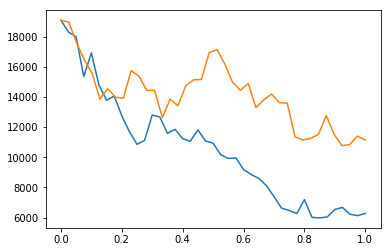

In [90]:
S, xs = gbm.modified_GBM(p[0], mu, sigma, W, N)

plt.plot(xs, S, np.linspace(0,1,len(p)), p)
plt.show()